#**PROJECT 2: FEATURE MATCHING**

##**1. Background**
In this project, first you will familiarize yourself with OpenCV functions for computing image derivatives and gradients. In particular, you will use the Sobel operator to find edge features in an input image. Then you will write functions for feature matching. Feature matching is the process of recognizing features of the same object(s) across images of a scene. In this project, we will learn how to extract distinctive key points from an image, how to compute a local feature descriptor from a region around each key point and how to find the corresponding local descriptors of two images of a scene taken from slightly different view points. You have been given two pairs of images, i.e., NotreDame, and Mount_Rushmore. These images are available under the 'data' folder. You may plot these images and observe that each pair of images corresponds to an object, but taken from different view points. 
Please find below the sample results that we are trying to generate for the given test data.



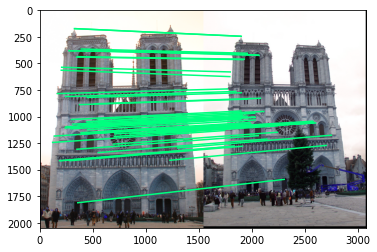

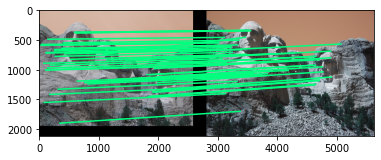

### **Your Tasks:**

1.  **Feature/Keypoint Detection:**   Finds interest points in the input images (graded activity). Implement the Harris corner detector (Szeleski 7.1.1).
2.   **Feature Description:** Each region around detected keypoint locations is converted into a more compact and stable (invariant) descriptor that can be matched against other descriptors (graded activity). We will use Scale Invariant Feature Transform (SIFT)-like descriptor (Szeleski 7.1.2).
3.   **Feature Matching:** Finds matching features in multiple images(graded activity). Implement ratio-test (nearest neighbor distance ratio) method for matching features (Szeleski 7.1.3, Equation 7.18)
4.   Finally visualizes the matches

Note that we will use some functions from `skimage` library (https://scikit-image.org/) along with `OpenCV` functions. scikit-image (`skimage`) is a collection of algorithms for image processing written in Python.

Before executing the following python code, you have to upload the `Feature_Matching` folder to your Google drive. Download the project from github repo and upload it into the `My Drive/Colab Notebooks` of your google drive. Now, let us mount the google drive and set the working directory to `My Drive/Colab Notebooks/Fearure_Matching`.

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
root_dir = "/content/gdrive/MyDrive/"
project_folder = "Colab Notebooks/Feature_Match/"
os.chdir(root_dir+project_folder)

#**2. Sobel Operator (20%)**

Before you start with the feature matching, we ask you to familiarize yourself with the Sobel operators that we discussed in the lecture. OpenCV provides function [Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) to calculate the derivatives from an image. The syntax follows.

`dst = cv.Sobel(src, ddepth, dx, dy, ksize, scale, delta, borderType)`

Parameters:



*  **src**	input image.
*   **dst**	output image of the same size and the same number of channels as src .
* **ddepth**	output image depth, see [combinations](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#filter_depths); in the case of 8-bit input images it will result in truncated derivatives.
* **dx**	order of the derivative x (vertical edges).
*  **dy**  	order of the derivative y (hrizontal edges).
* **ksize**	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
* **scale**	[optional] scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).
* **delta**	[optional] delta value that is added to the results prior to storing them in dst.
* **borderType**	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.


In the following code, we load the `lenna` image, convert it to a gray scale image for ease of computation (need to handle only one channel), and smooths that image using the Gaussian kernel. Then we apply the sobel() function on the `lenna` image to get the vertical and horizontal derivatives. Further, we use a weighted combination of these derivatives values as the final image gradients. 

Your task is to compute the gradient magnitude and oprientations and display the corresponding images. To compute the actual image gradients and orientations, you can use the gradiant magnitude formula from the lecture slide. 




In [ ]:
#Graded activity 1

import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io, filters, feature

#Read the image
lenna = cv.imread("./data/lenna.bmp", 1)

#Convert it to a gray scale aimge
gray = cv.cvtColor(lenna, cv.COLOR_BGR2GRAY)

#Remove noise
gray_smooth = cv.GaussianBlur(gray, (3, 3), 0)

#Sobel Operator (horizontal)
grad_x = cv.Sobel(gray_smooth, cv.CV_32F, 1, 0, ksize=3, borderType=cv.BORDER_DEFAULT)

#Sobel Operator (vertical)
grad_y = cv.Sobel(gray_smooth, cv.CV_32F, 0, 1, ksize=3, borderType=cv.BORDER_DEFAULT)

#Convert to uint8
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)    
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv2_imshow(grad)

# Compute magnitude and orientations

#compute the squares, cv.multiply()
sobelx2 = _________
sobely2 = _________

#compute the square root of the sum, check cv.sqrt()
magnitude = _________

cv2_imshow(magnitude)


#compute the orientation, you may use cv.phase()
orientation = __________

orientation = orientation / 2. 
hsv = np.zeros_like(lenna)
# Hue (in OpenCV between 0 to 180)
hsv[..., 0] = orientation 
# Saturation, set it to 255
hsv[..., 1] = 255 
# Value, values between 0 to 255
hsv[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX) 


bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv2_imshow(bgr)


Next task for you is to try different gradient operators available in OpenCV. Try Prewitt, Roberts and Canny edge detectors on smu image. Ry varying the hysteresis thresholds of Canny detector and analyze the results.

In [ ]:
#Graded activity 2
smu = cv.imread("./data/smu.jpg", 1)
gray= cv.cvtColor(smu, cv.COLOR_BGR2GRAY)

smu_gray = cv.GaussianBlur(gray, (3, 3), 0)

#Roberts kernel, refer to slides for the v and h kernels
roberts_v = np.array(_______ )  
roberts_h = np.array(_______ )

#Convolve with Roberts kernels
r_grad_x = cv.filter2D(smu_gray, cv.CV_32F, roberts_v)
r_grad_y = cv.filter2D(smu_gray, cv.CV_32F, roberts_h)

robertsx2 = ________
robertsy2 = ________
r_magnitude = _______

cv2_imshow(r_magnitude)

#Prewitt kernels, see the lecture slides
p_kernelx = np.array(______)
p_kernely = np.array(______)


#Convolve with Prewitt kernels
p_grad_x = cv.filter2D(smu_gray, cv.CV_32F, p_kernelx)
p_grad_y = cv.filter2D(smu_gray, cv.CV_32F, p_kernely)

prewittx2 = _______
prewitty2 = _______

p_magnitude = _______

cv2_imshow(p_magnitude)


#Canny edge detector, see cv.Canny() with 
smu_canny = cv.Canny(smu, 80, 150)
cv2_imshow(smu_canny)

# **3. Load and Display images**

Test data is available under the `data` folder. We will use the images of famous `NotreDame`, Paris for the first round. Let us load and plot the input images.  IN the image plots, you can see that the `NotreDame` images are taken from slightly different view points. Your final objective is to map the corresponding features in both the images. For instance, top left part of the building in image 1 should be mapped to the same part of the building in image 2 as shown in the tesaer images under Section 1.

In [ ]:
file_name = "NotreDame"
file1 = "./data/NotreDame/"+file_name+"1.jpg"
file2 = "./data/NotreDame/"+file_name+"2.jpg"

#Read color image
image1 = cv.imread(file1, 1)
image2 = cv.imread(file2, 1)


#Plot the images
cv2_imshow(image1)
cv2_imshow(image2)

Next we will comvert the input images to gray scale space. While you can use color images for feature extraction and matching, gray scale images speeds things up. To further reduce the computational time, we will resize the images to their half sizes using bilinear interpolation scheme.

In [ ]:
img1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)


#Rescale the images to their half sizes (bilinear interpolation)[To speed up the computation]

img1 = cv.resize(img1, None, fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)
img2 = cv.resize(img2, None, fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)

cv2_imshow(img1)
cv2_imshow(img2)

##**3. Key Points Extraction (30%)**
The next task is to extract distinctive key points (or interest points). There are many different ways to find key points in an image. We can use Harris corners detection, largely due to its simplicity. Moreover, we have discussed this algorithm in the lecture.

The Harris corners detection algorithm is based on a somewhat intuitive fact: image intensities adjacent to an object corner are generally dissimilar to the intensities at the corner. A method to find corners is to compute image gradients and determine the image locations with large changes in all the directions. The greater the gradient, the more likely a particular point corresponds to an object corner.

To find distinctive points in each image, you have to implement `extract_key_points()` function. We use Harris corner detector (See Szeliski 7.1.1) for this purpose. You do not need to worry about scale invariance or keypoint orientation estimation for your Harris corner detector. If you're finding spurious interest point detections near the boundaries, it is safe to simply suppress the gradients / corners near the edges of  the image. 

The `extract_key_points()` function takes `image` and `feature_width` as its parameters. The `feature_width` is the pixel width and pixel height of each local feature. Since we are using a SIFT like descriptor, we will set the `feature_width` to 16.

In [6]:
feature_width = 16   

 
  
 Algorithm description (Please refer to Lecture 6 slides):
 
 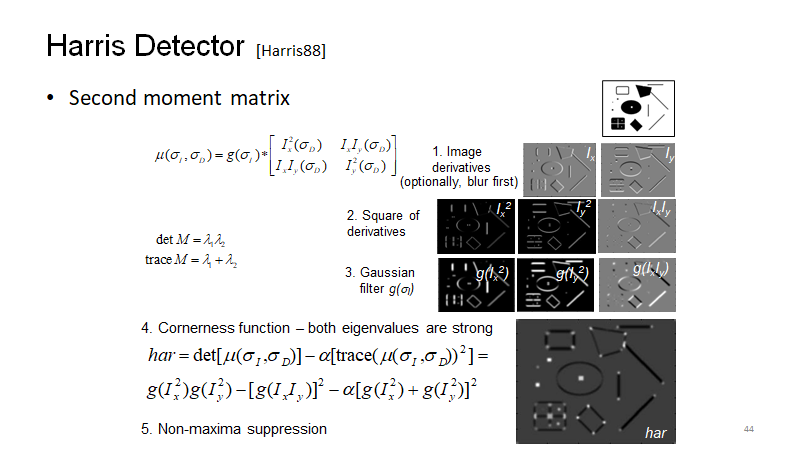
 
 Steps:
 - The algorithm first applies Gaussian filter to smooth the image.
 - Then computes the image derivatives (`I_x` and `I_y`) using `Sobel_h` and `Sobel_v` operators from `scikit filters`, refer to https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian.
 - Calculate the entries (`I_x^2`, `I_y^2` and `I_xI_y` for the second moment matrix (also called as structure tensor). Note that in the following function we denote `I_x^2` as `I_xx`, `I_y^2` as `I_yy` and `I_xI_y` as `I_xy`
 - We use a weighted entries of second moment matrix for calculating the `lambda_min`. So we weigh the entries `I_xx`, `I_yy` and `I_xy` using a Gaussian kernel again.
 - In the loops, we compute the determinant (`det`) and trace of the second moment matrix (`C`) of each pixel. Please note that we are using the following Harris corner function for feature extraction.
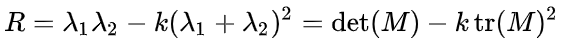
- Finally we apply non-maxima suppression (NMS) to pick only the optimal corner pixels. We use `feature.peak_local_max` from `scikit` to achieve NMS.

You will use the following functions from `skimage` (https://scikit-image.org/docs/stable/api/api.html). Please refer to the documentation for each function/library.
   
- skimage.feature.peak_local_max (experiment with different min_distance values to get good results)
- skimage.filters.gaussian
- skimage.filters.sobel_v and skimage.filters.sobel_h

 The following is a graded function. You have to fill out the blanks with appropriate code to get it working correctly. 

In [7]:
#Graded Activity 3
def extract_key_points(image, feature_width):
    '''
    Returns key points for the input image

    :params:
    :image: a grayscale image:
    :feature_width:

    :returns:
    :xs: an np array of the x coordinates of the interest points in the image
    :ys: an np array of the y coordinates of the interest points in the image     
    '''
    # For scaling the trace of M; an empirical value [0.04, 0.06]
    k = 0.06 
    #threshold for finding the optimal corner points
    threshold = 0.01
    #Number of pixels to be shifted for each computation
    stride = 2
    #Variance of teh Gaussian kernel
    sigma = 0.1
    #Parameter used for NMS
    min_distance = 3   

    
    #step1: blur image. Use filters.gaussian with sigma=0.1, refer to https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian
    filtered_image = filters.gaussian(image, sigma=0.1)
    
    # step2: calculate gradient of image, I_x and I_y. Use filters.sobel_v and filters.sobel_h operators
    I_x = ______________
    I_y = ______________

    # step3: calculate I_xx, I_xy, I_yy. Useful functions: np.square() and np.multiply(). Refer to https://numpy.org/doc/stable/reference/routines.math.html
    I_xx = ____________
    I_xy = ____________
    I_yy = ____________

    #Weighing the values of second moment matrix using Gaussian kernel

    I_xx = filters.gaussian(I_xx, sigma=0.1)
    I_xy = filters.gaussian(I_xy, sigma=0.1)
    I_yy = filters.gaussian(I_yy, sigma=0.1)

    listM = np.zeros_like(image)

    # step4: caculate M matrix
    for y in range(0, image.shape[0]-feature_width, stride):
        for x in range(0, image.shape[1]-feature_width, stride):
          
            # 17x17 matrix 
            Sxx = np.sum(I_xx[y:y+feature_width+1, x:x+feature_width+1])
            Syy = np.sum(I_yy[y:y+feature_width+1, x:x+feature_width+1])
            Sxy = np.sum(I_xy[y:y+feature_width+1, x:x+feature_width+1])

            #Compute the determinant of M, refer to the lecture slides 6
            detM = ___________

            #Compute the trace of M, refer to the lecture slides 6
            trM = __________

            M = detM - k*(trM**2)
            
            if M > threshold:
                listM[y+feature_width//2, x+feature_width//2] = M

    # step5: using non-maximal suppression, refer to https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max
    ret = feature.peak_local_max(listM, min_distance=min_distance, threshold_abs=threshold)
    return ret[:, 1], ret[:, 0]

Now let us use the `extract_key_points()` function to extract the key/interest/feature points. The key points of both the images are collected in `(x1, y1)` and `(x2, y2)` where `x1` is a list of all the x-coordinates of key points of image 1. Similarly `y1`, `x2` and `y2` collect their respective coordinates.

In [8]:
print("Key Points Extraction...")
(x1, y1) = extract_key_points(img1, feature_width)
(x2, y2) = extract_key_points(img2, feature_width)

    

Key Points Extraction...



Visualize the extracted key points. Use `plt.imshow()` to plot the images. Refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html for the parameter details of `plt.imshow()`. All the blue points represent the keypoints detected by Harris corner detection function, i.e., `extract_key_points()`.
  

In [ ]:
plt.imshow(img1, cmap="gray")
plt.scatter(x1, y1, alpha=1, s=2)
plt.show()

plt.imshow(img2, cmap="gray")
plt.scatter(x2, y2, alpha=1, s=2)
plt.show()

print("Key Points Extraction Completed!")

# **4. Computing the Feature Descriptor (SIFT)(40%)**

A local feature descriptor is a set of data that localizes a key point, i.e., descriptor holds the information to make it unique. As with detecting key points, there are quite a few ways to compute a local descriptor for a key point. For this project, we will implement SIFT (scale-invariant feature transform) descriptors (See Szeliski 7.1.2 or the original publications at     http://www.cs.ubc.ca/~lowe/keypoints/). You can think of SIFT descriptor as a signature which can be used for matching images. SIFT descriptors are computed by determining the intensity gradients of a small window, 16x16 in this implementation, surrounding a key point. This 16x16 window is further subdivided into a 4x4 batch of 4x4 regions; eight gradients for the pixels in each of these regions are "binned" together, resulting in an 8x4x4 = 128 dimensinal descriptor.

The following implementation does not exactly match the SIFT reference. Here are the key properties of our descriptor:

1.   A 4x4 grid of cells, each feature_width / 4 pixels square.
2.   Each cell has a histogram of the local distribution of gradients in 8 orientations. Appending these histograms together will give us 4 x 4 x 8 = 128 dimensions.
3. Each feature should be normalized to unit length

Please refer to the picture below. **Note that the picture shows only a 2 x 2 grid of cells. In this implementation, we consider 4 x 4 grid of cells.**



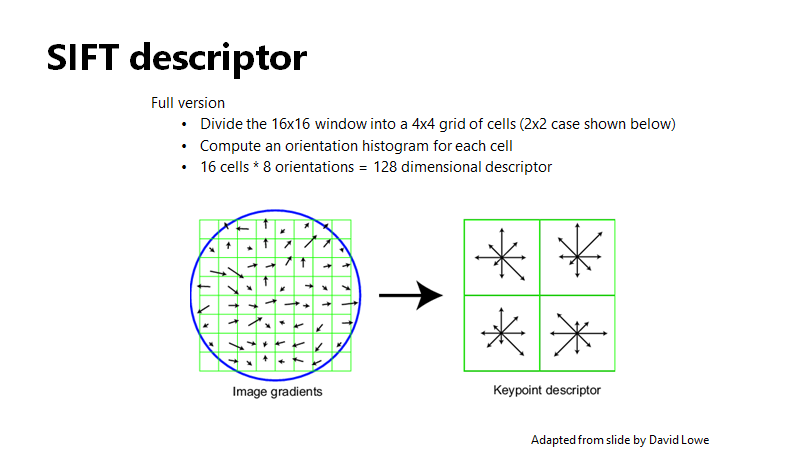

We don't perform the interpolation in which each gradient measurement contributes to multiple orientation bins in multiple cells. As described in the book by Szeliski, a single gradient measurement creates a weighted  contribution to the 4 nearest cells and the 2 nearest orientation bins within each cell, for 8 total contributions. This type of interpolation probably will help us, though.

You do not need to do the normalize -> threshold -> normalize again operation as detailed in Szeliski and the SIFT paper. It is useful though.

Another simple trick which can help is to raise each element of the final     feature vector to some power that is less than one.

In [10]:
#Graded Activity 4
def sift_features(image, x, y, feature_width):
    '''
    :params:
    :image: a grayscale or color image (your choice depending on your implementation)
    :x: np array of x coordinates of key points
    :y: np array of y coordinates of key points
    :feature_width: in pixels, is the local feature width. You can assume
                    that feature_width will be a multiple of 4 (i.e. every cell of your
                    local SIFT-like feature will have an integer width and height).
    
    :returns:
    :features: np array of computed features. It should be of size [len(x) * feature dimensionality] 
    (for standard SIFT feature dimensionality is 128)

    '''

    x = np.round(x).astype(int)
    y = np.round(y).astype(int)

    #Variance of the optional Gaussian blurring of the image
    sigma_gradient_image = 0.1
    #Variance for the Gaussian filter on the feature window
    sigma_16x16 = 0.4
    #For clamping the feature vector values
    threshold = 0.2

    #Feature vectors list, len(x) x 4 x 4 x 8 dimension
    features = np.zeros((len(x), 4, 4, 8))
    
    # step0: blur image (This step is optional, you may try without blurring)
    filtered_image = filters.gaussian(image, sigma=sigma_gradient_image)
    
    # step1: compute the gradient of image
    grad_x = filters.sobel_v(filtered_image)
    grad_y = filters.sobel_h(filtered_image)

    #Compute the magnitude and the direction of gradients, useful functions: np.sqrt(), np.add(), np.square(), np.arctan2()
    magnitude_gradient = _____________
    direction_gradient = _____________
    direction_gradient[direction_gradient < 0] += 2 * np.pi

    # step2:
    for n, (x_, y_) in enumerate(zip(x, y)):
        # get the feature window of key point(x, y)
        rows = (y_ - feature_width//2, y_ + feature_width//2 + 1)
        cols = (x_ - feature_width//2, x_ + feature_width//2 + 1)

        #Adjust the feature windows for border key points
        if rows[0] < 0:
            rows = (0, feature_width+1)
        if rows[1] > image.shape[0]:
            rows = (image.shape[0]-feature_width-1, image.shape[0]-1)

        if cols[0] < 0:
            cols = (0, feature_width+1)
        if cols[1] > image.shape[1]:
            cols = (image.shape[1]-feature_width-1, image.shape[1]-1)

        # get the window region around the key point
        magnitude_window = magnitude_gradient[rows[0]:rows[1], cols[0]:cols[1]]
        direction_window = direction_gradient[rows[0]:rows[1], cols[0]:cols[1]]

        # Gaussian filter on window
        magnitude_window = filters.gaussian(magnitude_window, sigma=sigma_16x16)
        direction_window = filters.gaussian(direction_window, sigma=sigma_16x16)

        #16 x 16 feature window is divided into 4 x 4 cells. Variables i and j loops over each cell to compute the local distribution of gradients
        # in 8 orientations.
        for i in range(feature_width//4):
            for j in range(feature_width//4):
                #Get the cell region
                current_magnitude = magnitude_window[i*feature_width//4: (i+1)*feature_width//4, j*feature_width//4:(j+1)*feature_width//4]
                current_direction = direction_window[______: ______, ______:_______]

                #We will use histogram() function available in numpy to compute the histogram, refer to https://numpy.org/doc/stable/reference/generated/numpy.histogram.html, refer to the lecture slides for the number of bins and the range of angles
                features[n, i, j] = np.histogram(current_direction.reshape(-1), bins=____, range=(___, ____), weights=current_magnitude.reshape(-1))[0]

    # Extract 16 x 8 values into 128-dimensional vector, see features.reshape() for more details. HINT: For each key point, you have to create a 128 dimensional vector as the feature vector from 4 X 4 X 8 tensor. See the use of -1 in reshape() function.
    features = features.reshape(_________)

    # Normalize vector to [0..1]. Find the norm of the feature vector 
    norm = np.sqrt(np.square(features).sum(axis=1)).reshape(-1, 1)

    #Divide every component of the feature vector by the norm
    features = ______________

    # Clamp all vector values > 0.2 to 0.2
    features[__________] = threshold

    # Re-normalize after clamping
    norm = np.sqrt(np.square(features).sum(axis=1)).reshape(-1, 1)
    features = features / norm

    return features


Now let use the `sift_features()` function to create feature vectors at each key point. Szeliski 7.1.2. The dimensions of `image1_features` and `image2_features` are `len(x1) x 128`

In [11]:
print("Extracting SIFT like Features...")

image1_features = sift_features(img1, x1, y1, feature_width)
image2_features = sift_features(img2, x2, y2, feature_width)

print("Feature Extraction Done!")

Extracting SIFT like Features...
Feature Extraction Done!


# **5. Feature Matching (10%)**

 Match features. Szeliski 7.1.3. First implement the feature matching algorithm. We will implement the Nearest Neighbor Distance Ratio Test (Equation 4.18 in Section 7.1.3 of Szeliski) to assign matches between interest points in two images. Your task is to write the code for NNDR.

A match is between a feature in `im1_features` and a feature in `im2_features`. We can represent this match as the index of the feature in `im1_features` and the index of the feature in `im2_features`

Let us see what the for loop in `match_features()` does. 

**Loop:** For each feature f1 of image 1, find the `distances` between f1 and all the features in image 2. Sort `distances` to find the first two nearest neighbors given by `nearest_index[0]` and `nearest_index[1]`. The corresponding distances reptesent the `d1` and `d2` in Equation 7.18 of Szeliski. Find out NNDR and append the corresponding features to `matches` if the `NNDR` is less than the threshold. You can find Equation 7.18 and an illustration on the behaviour of various feature matching criteria.

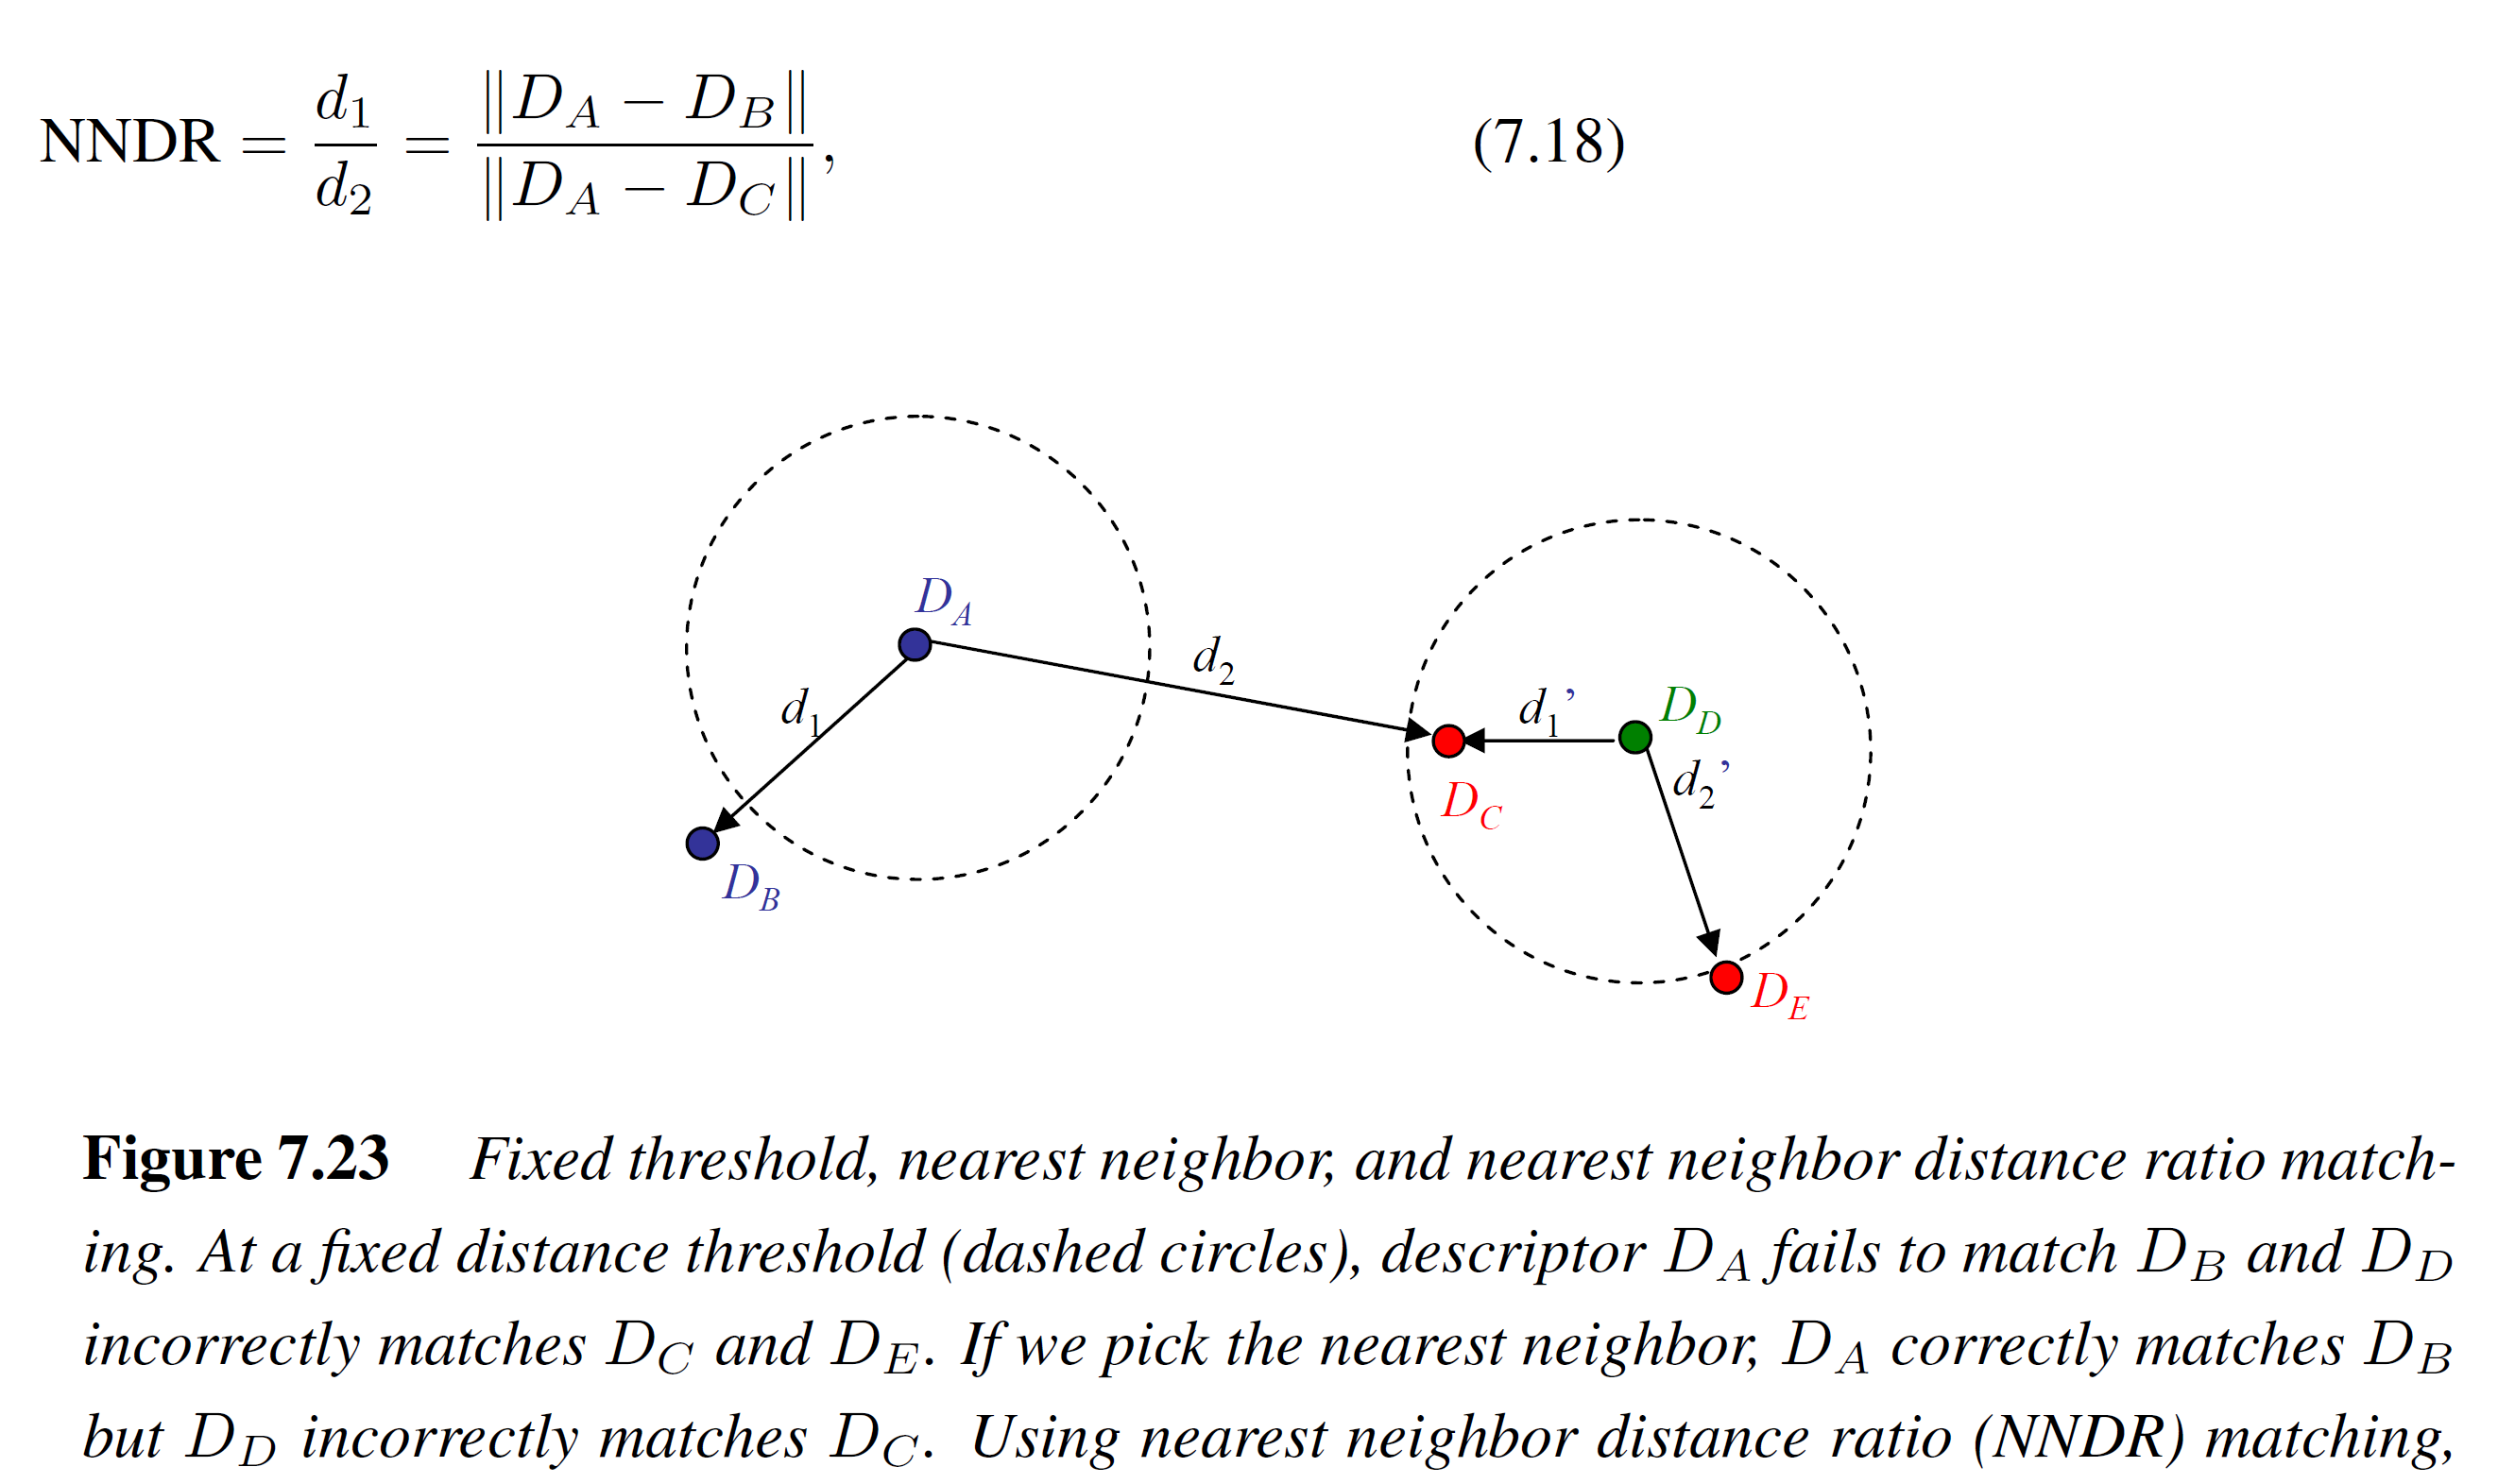

Remember that the `NNDR` test will return a number close to 1 for feature points with similar distances. Corresponding confidence values are computed by subtracting `NNDR` from 1. A higher confidence indicates a better match.

In [14]:
#Graded Activity 5
def match_features(im1_features, im2_features):
    '''
    :params:
    :im1_features: an np array of features returned from sift_features() for key points in image1
    :im2_features: an np array of features returned from sift_features() for key points in image2

    :returns:
    :matches: an np array of dimension k x 2 where k is the number of matches. The first
            column is an index into im1_features and the second column is an index into im2_features
    :confidences: an np array with a real valued confidence for each match
    '''
    #Threshold for NNDR
    threshold = 0.8

    #Array to store the indices of matching pairs
    matches = []
    #Array to store the corresponding confidence values.
    confidences = []

    for i in range(im1_features.shape[0]):
        #Compute the distances between i th feature of image1 with all the features of image2. You may use np.sqrt(), np.square(), np.subtract() and sum() functions. 
        distances = ________________
        #Sort the feature distances
        nearest_index = np.argsort(distances)
        #Compute the NNDR and append the corresponding features in matches if the NNDR is less than the threshold.
        NNDR = _______________
        if  NNDR < threshold:
            #Append the indices of feature pairs to matches
            matches.append([i, nearest_index[0]])
            #Compute and append the confidence value
            confidences.append(1.0 - NNDR)

    matches = np.asarray(matches)
    confidences = np.asarray(confidences)

    return matches, confidences


Get the matched pairs of the feature descriptors along with the corresponding `confidence` values.

In [15]:
print("Matching the Features...")

matches, confidences =match_features(image1_features, image2_features)

print("Feature Matching Done!")

Matching the Features...
Feature Matching Done!


We use the following visualization function to show the feature pairs on the images. Refer to `plot_matches()` function of `skimage.feature` for the details about of the parameters, see https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.plot_matches. We don't visualize all the matches. Only the best matches as per their confidence values will be displayed.

In [16]:
from skimage.feature import plot_matches
def show_correspondences(imgA, imgB, X1, Y1, X2, Y2, matches, number_to_display, filename=None):
	'''
		Visualizes corresponding points between two images, either as
		arrows or dots

		mode='dots': Corresponding points will have the same random color
		mode='arrows': Corresponding points will be joined by a line

		Writes out a png of the visualization if 'filename' is not None.
	'''
	# Create a figure so students see the images and the matched feature pairs
	fig, ax = plt.subplots(nrows=1, ncols=1)
  
	#Extract the top `number_to_display` matches
	matches_to_display = matches[0:number_to_display, :]
	
	#Zip the key point coordinates of the two images
	kp1 = zip_x_y(Y1, X1)
	kp2 = zip_x_y(Y2, X2)
	matches = matches.astype(int)
 
  #Plot the required number of matches on the images
	plot_matches(ax, imgA, imgB, kp1, kp2, matches_to_display, keypoints_color = 'red', matches_color='springgreen', only_matches=True)
	
	fig = plt.gcf()

	#Save the results
	if filename:
		if not os.path.isdir('./results'):
			os.mkdir('./results')
		fig.savefig('./results/' + filename)
	plt.show()
	return

#Function to zip the x and y coordinates
def zip_x_y(x, y):
	zipped_points = []
	for i in range(len(x)):
		zipped_points.append(np.array([x[i], y[i]]))
	return np.array(zipped_points)

The last thing to do is to visualize the feature correspondences in the image pairs we have provided. The following code will visualize the matches by drawing green lines between the matched points. The visualizer will show the top `num_pts_to_visualize` (set to 50) most confident matches, so feel free to change the parameter to whatever you like. Please note that some of the matches may be incorrect and it is quite normal to have some incorrect matches. 

In [ ]:
print("Matches: " + str(matches.shape[0]))
conf_indices = np.argsort(-confidences, kind='mergesort')
matches = matches[conf_indices]
confidences = confidences[conf_indices]

num_pts_to_visualize = 50
scale_factor = 0.5
show_correspondences(image1, image2, x1 / scale_factor, y1 / scale_factor, x2 / scale_factor, y2 / scale_factor, matches, num_pts_to_visualize, "notre_dame_matches.jpg")

Next repeat the feature matching for `Mount_Rushmore` images.

In [ ]:
file_name = "Mount_Rushmore"
file1 = "./data/MountRushmore/"+file_name+"1.jpg"
file2 = "./data/MountRushmore/"+file_name+"2.jpg"

#Read color image
image1 = cv.imread(file1, 1)
image2 = cv.imread(file2, 1)


#Plot the images
cv2_imshow(image1)
cv2_imshow(image2)

#Convert to gray scale
img1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

#Rescale the images to their half sizes (bilinear interpolation)[To speed up the computation]
img1 = cv.resize(img1, None, fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)
img2 = cv.resize(img2, None, fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)

cv2_imshow(img1)
cv2_imshow(img2)

#Key point extraction
print("Key Points Extraction...")
(x1, y1) = extract_key_points(img1, feature_width)
(x2, y2) = extract_key_points(img2, feature_width)

#SIFt feature description
print("Extracting SIFT like Features...")

image1_features = sift_features(img1, x1, y1, feature_width)
image2_features = sift_features(img2, x2, y2, feature_width)

print("Feature Extraction Done!")

#Feature matching
print("Matching the Features...")

matches, confidences =match_features(image1_features, image2_features)

print("Feature Matching Done!")

#Visualization
print("Matches: " + str(matches.shape[0]))
conf_indices = np.argsort(-confidences, kind='mergesort')
matches = matches[conf_indices]
confidences = confidences[conf_indices]

num_pts_to_visualize = 50
scale_factor = 0.5
show_correspondences(image1, image2, x1 / scale_factor, y1 / scale_factor, x2 / scale_factor, y2 / scale_factor, matches, num_pts_to_visualize, "mount_rushmore_matches.jpg")


#**6. Evaluation Details**
This tutorial project is meant to be done in three recitations (Sept 28, Oct. 5 & Oct. 12). You will get a total of 16 days to complete the activities. Attendance in each recitation is mandatory to get marks for the graded activities. We will record your attendance. If you complete all the activities in the first recitation itself, then the second recitation is optional. You have to read the instructions, refer to the slides and do all the exercises, refer to the materials as and when necessary (especially for syntaxes). Evaluation will be done in the recitations, mainly in the second recitation. The marker will evaluate your work during the recitation on Oct. 12. During the evaluation, you will be asked to show the graded activities and you may expect a couple of related questions.

**NOTE** In case you are unable to attend the recitation, you have to inform the instructor before the recitation and absence due to sickness orr other genuine grounds will be considered.

#**7. References/Source**
1. James Hayes, Georgia Tech, CS 4476-B / 6476-A Computer Vision Course
2. Richard Szeleski, Computer Vision: Algorithms and Applications, Second edition